In [1]:
import pandas as pd
import numpy as np
import os
import pprint

%matplotlib inline
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import nba_acquire

np.random.seed(123)

In [2]:
pd.__version__

'0.25.3'

## 'player_data_df' work

In [3]:
player_data_df = nba_acquire.player_data()

player_data_df.head()

Player Data Information
Consisting of 4550 rows and 8 columns
It has loads of data, but also has 341 missing values.


,name,year_start,year_end,position,height_inches,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,82,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,81,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,86,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,73,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,78,223.0,"November 3, 1974",San Jose State University


In [4]:
player_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name             4550 non-null object
year_start       4550 non-null int64
year_end         4550 non-null int64
position         4550 non-null object
height_inches    4550 non-null int64
weight           4550 non-null float64
birth_date       4550 non-null object
college          4550 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 284.5+ KB


In [5]:
# because of merge later, we need to verify no columns are dupes
player_data_df.columns.duplicated()

array([False, False, False, False, False, False, False, False])

In [6]:
# change 'name' column to 'player' column so we can merge later
player_data_df = player_data_df.rename(columns={"name" : "player"})

In [7]:
# Seeing if there are any duplicate players in the 4,550 listed
player_data_df.index.nunique()

4550

In [8]:
player_data_df.player.nunique()

4500

**4,550 rows of data, but 4,500 unique names.  Could be repeats - let's check to see what these duplicate player names look like:**

In [9]:
# assign the column data to a variable
names = player_data_df["player"]

# checks to see if a name is duplicated in the player column, 
# then sorts_values on "player"
player_data_df[names.isin(names[names.duplicated()])].sort_values("player")

,player,year_start,year_end,position,height_inches,weight,birth_date,college
423,Bill Bradley,1968,1968,G,71,165.0,"June 16, 1941",No college listed
424,Bill Bradley,1968,1977,F-G,77,205.0,"July 28, 1943",Princeton University
1069,Bob Duffy,1963,1965,G,75,185.0,"September 26, 1940",Colgate University
1068,Bob Duffy,1947,1947,F,76,175.0,"July 5, 1922",Tulane University
2062,Bobby Jones,1975,1986,F,81,210.0,"December 18, 1951",University of North Carolina
...,...,...,...,...,...,...,...,...
1938,Tony Jackson,1981,1981,G,72,170.0,"January 17, 1958",Florida State University
2786,Tony Mitchell,2014,2014,F,78,216.0,"August 7, 1989",University of Alabama
2787,Tony Mitchell,2014,2014,F,80,235.0,"April 7, 1992",University of North Texas
3522,Walker Russell,2012,2012,G,72,170.0,"October 6, 1982",Jacksonville State University


In [10]:
names.value_counts()

Charles Jones      3
George Johnson     3
Charles Smith      3
Bobby Wilson       2
Walker Russell     2
                  ..
Andre Wakefield    1
Joe Roberts        1
Joe Smyth          1
Dean Tolson        1
Brad Branson       1
Name: player, Length: 4500, dtype: int64

Looks like the reason there are only 4,500 unique player names in the 4,550 rows of data is because there are 50 instances of duplicated names (from above, there are three players named **'George Johnson,'** three named **'Charles Jones,'** etc).  Thanks to the other data in the DataFrame, we can determine the details of each player as we do analysis.

Bill Russell, Dr. J, Kareem Abdul-Jabbar... all these guys dominated the league in their prime.  But it DOES seem like the players today are taller and heavier than they used to be.  Let's take a look at how the sizes of the players have changed over the years.

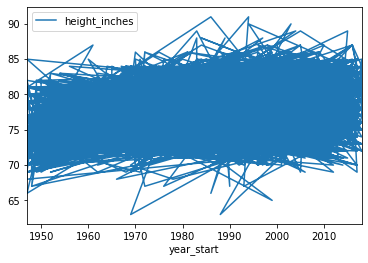

In [11]:
# height_inches over the years

player_data_df.plot(x="year_start", y=["height_inches"])

# choosing 'year_start' because it's a more accurate representation of the league heights 
# the year the player entered the league

Ugh.  Clearly there's a correlation here - the players ARE getting taller over time, but let's clean this up a bit.

In [12]:
# group mean heights by year_start and then assign to a plotting variable
height_plot_df = player_data_df.groupby("year_start")["height_inches"].mean() 

height_plot_df.head()

year_start
1947    74.322981
1948    74.325000
1949    75.244681
1950    75.116667
1951    76.400000
Name: height_inches, dtype: float64

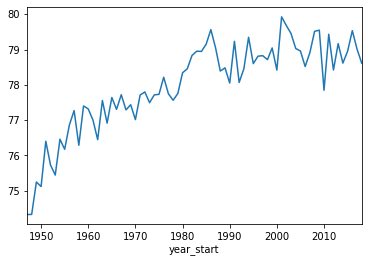

In [13]:
height_plot_df.plot(x="year_end", kind = "line")

In [14]:
# group mean weights by year_start and then assign to a plotting variable
weight_plot_df = player_data_df.groupby("year_start")["weight"].mean() 

weight_plot_df.head()

year_start
1947    188.633540
1948    184.450000
1949    192.851064
1950    190.100000
1951    196.233333
Name: weight, dtype: float64

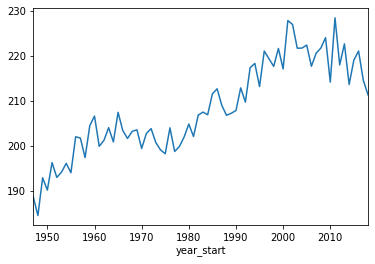

In [15]:
weight_plot_df.plot(x="year_start", kind = "line")

Taking a look at the heights and weights of the aforementioned players (Bill Russell, Dr. J, Kareem) and how they compare to the averages of the rest of the league at their respective positions:

- get the player data by the index (make sure I spell the names right...)

- average the heights and weights of year_start and year_end (their career length) at their positions

In [16]:
# get the player index of Bill Russell
player_data_df.loc[player_data_df["player"] == "Bill Russell"]

,player,year_start,year_end,position,height_inches,weight,birth_date,college
3513,Bill Russell,1957,1969,C,82,215.0,"February 12, 1934",University of San Francisco


In [17]:
# take a look at all the Centers during the span of the Bill Russell era

all_centers = player_data_df[player_data_df["position"] == "C"]

centers_during_russell_era = all_centers.query("1957 <= year_start < 1969")

centers_during_russell_era.head()

,player,year_start,year_end,position,height_inches,weight,birth_date,college
37,Gary Alcorn,1960,1961,C,81,225.0,"October 8, 1936","California State University, Fresno"
79,Dan Anderson,1968,1969,C,82,230.0,"February 15, 1943",Augsburg College
253,Al Beard,1968,1968,C,81,200.0,"April 27, 1942",Norfolk State University
261,Zelmo Beaty,1963,1975,C,81,225.0,"October 25, 1939",Prairie View A&M University
280,Walt Bellamy,1962,1975,C,83,225.0,"July 24, 1939",Indiana University


In [18]:
# average height (in inches) of Centers during Bill Russell era

centers_during_russell_era["height_inches"].mean()

82.05128205128206

In [19]:
# average weight (in pounds) of Centers during Bill Russell era

centers_during_russell_era["weight"].mean()

228.10256410256412

**So it looks like Bill Russell was:**

- just average (in fact, .05" *under* average) height in his career; and

- under the average weight for centers during his career by about 13 pounds

**Now to check the second player in our list of 3, Dr. J ("Julius Erving")**

In [20]:
# get the player index of Julius Erving
player_data_df.loc[player_data_df["player"] == "Julius Erving"]

,player,year_start,year_end,position,height_inches,weight,birth_date,college
1175,Julius Erving,1972,1987,F-G,79,210.0,"February 22, 1950",University of Massachusetts Amherst


In [21]:
# take a look at all the Forwards / Guards (F-G) during the span of the Dr. J era

all_fgs = player_data_df[player_data_df["position"] == "F-G"]

fgs_during_docj_era = all_fgs.query("1972 <= year_start < 1987")

fgs_during_docj_era.head()

,player,year_start,year_end,position,height_inches,weight,birth_date,college
17,George Adams,1973,1975,F-G,77,210.0,"May 15, 1949",Gardner-Webb University
28,Mark Aguirre,1982,1994,F-G,78,232.0,"December 10, 1959",DePaul University
95,Ron Anderson,1985,1994,F-G,79,215.0,"October 15, 1958","California State University, Fresno"
185,Gene Banks,1982,1987,F-G,79,215.0,"May 15, 1959",Duke University
318,Bob Bigelow,1976,1979,F-G,79,215.0,"December 26, 1953",University of Pennsylvania


In [22]:
# average height (in inches) of F-Gs during Doctor J era

fgs_during_docj_era["height_inches"].mean()

78.2258064516129

In [23]:
# average weight (in pounds) of F-Gs during Doctor J era

fgs_during_docj_era["weight"].mean()

204.80645161290323

**So it looks like Dr. J was:**

- taller than the average F/G during his career by over three-quarters of an inch (~.78"); and

- roughly five (5) pounds heavier during than all the average F/G during his career (~5.2lbs)
    

**Finally, we look at Kareem Abdul-Jabbar, the last in our list**

In [24]:
# get the player index of Kareem / Lou Alcindor
player_data_df.loc[player_data_df["player"] == "Kareem Abdul-Jabbar"]

,player,year_start,year_end,position,height_inches,weight,birth_date,college
2,Kareem Abdul-Jabbar,1970,1989,C,86,225.0,"April 16, 1947","University of California, Los Angeles"


In [25]:
# take a look at all the Centers during the span Kareem's playing days

# all_centers = player_data_df[player_data_df["position"] == "C"] - from Russell code

centers_during_kareem_era = all_centers.query("1970 <= year_start < 1989")

centers_during_kareem_era.head()

,player,year_start,year_end,position,height_inches,weight,birth_date,college
2,Kareem Abdul-Jabbar,1970,1989,C,86,225.0,"April 16, 1947","University of California, Los Angeles"
41,Chuck Aleksinas,1985,1985,C,83,260.0,"February 26, 1959",University of Connecticut
154,Dennis Awtrey,1971,1982,C,82,235.0,"February 22, 1948",Santa Clara University
167,Carl Bailey,1982,1982,C,84,210.0,"April 23, 1958",Tuskegee University
187,Walker Banks,1971,1971,C,82,205.0,"August 26, 1947",Western Kentucky University


In [26]:
# average height (in inches) of Centers during Kareem era

centers_during_kareem_era["height_inches"].mean()

83.31896551724138

In [27]:
# average weight (in pounds) of Centers during Kareem era

centers_during_kareem_era["weight"].mean()

234.31034482758622

**So Kareem Abdul-Jabbar was:**

- almost three inches taller than the other Centers during his reign (~2.69"); and

- nearly ten pounds (~9.31 pounds) lighter than the other Centers of his era

**Seeing that all this code is repetitive, we can come up with a function to facilitate everything:**

In [28]:
# part 1: get the player index

def player_index(player):
    """
    function to see how a select player's height in inches and weight in pounds
    compared to the other players at the same position during their days of playing
    """
    
    # get the player index 
    player_in_df = player_data_df.loc[player_data_df["player"] == player]
    
    # get back the index
    return player_in_df
    
    
    # take a look at all the players at that position playing days

    # all_centers = player_data_df[player_data_df["position"] == "C"] - from Russell code

#     centers_during_kareem_era = all_centers.query("1970 <= year_start < 1989")

#     centers_during_kareem_era.head()
    

In [29]:
# checking to see if function works
player_index("Michael Jordan")

,player,year_start,year_end,position,height_inches,weight,birth_date,college
2116,Michael Jordan,1985,2003,G-F,78,195.0,"February 17, 1963",University of North Carolina


In [32]:
# part 2: get the other players at tht position during the player's era

def on_court(rookie_year):
    """
    function to get the range of the players' playing years and those at same position
    """
    range = [player_data_df["year_start", "year_end"]]

    for a, b in range:
        if a <= rookie_year <= b:
            return rookie_year
        return False

    
#     # get the player's position
#     role = player_data_df["position"]
#     all_positions = player_data_df[player_data_df["position"] == role] 
#     return all_positions
    
    # get the position data during players' playing years
    

#     centers_during_kareem_era = all_centers.query("1970 <= year_start < 1989")

#     centers_during_kareem_era.head()
    

In [33]:
on_court(1985)

KeyError: ('year_start', 'year_end')

In [ ]:
all_pos_df = player_data_df.loc[player_data_df["year_start"]==1957]

center_rookie_year_df = all_pos_df.loc[all_pos_df["position"]== "C"]

center_rookie_year_df

In [ ]:
# mean height of all Centers during the Bill Russell era
center_df = player_data_df["position"] == "C"
center_mean_ht = player_data_df.loc[center_df, "height_inches"].mean()

year_start_centers = player_data_df.loc[center_df, player_data_df.loc[1957]
# year_end_centers = player_data_df.loc[player_data_df["year_end"] == 1969]

print(year_start_centers)

#russell_era_centers


In [ ]:
# mean height and weight of Centers the year he started

year_start_centers = player_data_df.loc[player_data_df["year_start"]== 1957]
year_end_centers = player_data_df.loc[player_data_df["year_end"] == 1969]

russell_era_centers = year_start_centers, year_end_centers

russell_era_centers

In [ ]:
# mean height and weight of Centers the year he retired

year_end_centers = player_data_df.loc[player_data_df["year_end"]== 1969].mean()

year_end_centers

In [ ]:
# Doctor J
player_data_df.loc[player_data_df["player"] == "Julius Erving"]

In [ ]:
# mean height and weight of Forwards the year he started

In [ ]:
# mean height and weight of Guards the year he started

In [ ]:
# mean height and weight of Forwards the year he retired

In [ ]:
# mean height and weight of Guards the year he retired

In [ ]:
# Kareem
player_data_df.loc[player_data_df["player"] == "Kareem Abdul-Jabbar"]

In [ ]:
# mean height and weight of Centers the year he started

In [ ]:
# mean height and weight of Centers the year he retired

## Now for 'players_df' work

In [ ]:
players_df = nba_acquire.data_of_players()

players_df.head()

In [ ]:
# change 'Player' column to 'player' so we can merge later
players_df = players_df.rename(columns={"Player" : "player"})

In [ ]:
players_df.info()

In [ ]:
# make sure no columns are duped for later merger
players_df.columns.duplicated()

## Lastly, 'seasons_stats_df'

In [ ]:
seasons_stats_df = nba_acquire.seasons_stats()

seasons_stats_df.head()

In [ ]:
seasons_stats_df.info()

In [ ]:
# checking for dupes for later merge
seasons_stats_df.columns.duplicated()

**We have a duplicated column at column 39.  For a successful dataframe merger, we need to get rid of that column.**

In [ ]:
# assigns new seasons_stats_df to be all the columns that
# are NOT (~) duplicated

# if we don't do this now, when we import the final_df 
# from this notebook, we will get the following error:
# "ValueError: Plan shapes are not aligned"

# that error tells us there is a duplicate column in one 
# of the dataframes

seasons_stats_df = seasons_stats_df.loc[:,~seasons_stats_df.columns.duplicated()]

In [ ]:
seasons_stats_df.columns.duplicated()

**Now that the duplicated column has been eliminated, we can address the fact that 'seasons_stats_df' contains a lot of floats where we could have integers.  Again: hate the '.0' if there's no need for one**

In [ ]:
# using dictionary to convert specific columns 
convert_dict = {"2_point_tries" : int, 
                "2_pointers" : int,
                "3_point_tries" : int,
                "3_pointers" : int, 
                "age" : int,
                "assists" : int, 
                "blocks" : int, 
                "def_rebounds" : int, 
                "field_goal_attempts" : int, 
                "field_goals" : int,
                "free_throws" : int, 
                "free_throw_attempts" : int, 
                "games" : int, 
                "games_started" : int, 
                "off_rebounds" : int, 
                "personal_fouls" : int, 
                "points" : int, 
                "steals" : int,
                "three_pt_tries" : int,
                "total_rebounds" : int, 
                "turnovers" : int, 
                "year" : int,
               } 

# turn off column limit so I can see the data in all columns:
pd.options.display.max_columns = None
  
seasons_stats_df = seasons_stats_df.astype(convert_dict) 
print(seasons_stats_df.dtypes.tolist()) 

# # save the columns as a variable
# float_cols = ["2_point_tries", "2_pointers", "3_point_tries", "3_pointers", 
#              "age", "assists", "blocks", "def_rebounds", "field_goal_attempts",
#              "field_goals", "free_throw_attempts", "games", "games_started",
#              "off_rebounds", "personal_fouls", "points", "steals", 
#              "total_rebounds", "turnovers", "year",]

# # convert those columns to integers
# seasons_stats_df = seasons_stats_df[float_cols].astype(int) 

# # check to see the datatypes have changed to what I wanted
# seasons_stats_df.head()

In [ ]:
seasons_stats_df.head()

**Because a lot of this info is repetitive and we can do a better analysis of the data in such a manner, I am combining the three dataframes into one**

- The backbone will be the seasons_stats_df, as it is by far the most comprehensive.  However, 'player_data_df' and 'players_df' both have additional information, like each player's height (in inches), weight (in pounds), and the college the attended (if they went to college)

- When doing analysis we can append the data as needed

**First, though, we need to develop a data dictionary to figure out what all this is.**

**player_efficiency -** per its inventor (ESPN columnist John Hollinger), it "sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."  Basically, the formula for calculating it is:
>*positive deed - negative deed = per minute rating of player's performance*

**true_shooting_% -** a measure of shooting efficiency taking into account 3-pointers, 2-pointers, and free throws.  Calculated using *points / (2 X shooting attempts)*

**rebound -** when someone misses a shot, whoever grabs the ball after the missed shot gets the 'rebound.'  If the person is on the same team as the one who took the shot, that's called an 'offensive rebound.'  If on the other team, a 'defensive rebound.' 

**off_rebound_% -** an estimated percentage of the total amount of rebounds a player got per game that maintained possession for their team 

**def_rebound_% -** an estimated percentage of the total amount of rebounds a player got per game that turned possession in favor of their team. 

**asst_% -** an assist is when one player passes to another who makes the basket after receiving the pass.  They receiver is entitled to one dribble after getting the pass - more than that, and the player who passed them the ball loses the assist

**usage_% -** an estimate of the percentage of team plays involving the individual player during his time on the court

**win_shares -** an estimate of the number of team wins to which the individual player contributed.  It includes the number of points the player contributed, as well as that player's time of possession compared to the average time of possession for the rest of the league

- **offensive_win_shares -** 

- **defensive_win_shares -**

- **win_shares_per_48min -**

**box_plus_minus _**

- **off_box_plus_minus -**

- **def_box_plus_minus -**

**value_over_replacement -**

**field_goals -**

**effective_field_goal_% -**

In [ ]:
# seasons_stats_df["height_inches"] = np.where(seasons_stats_df["player"] == player_data_df["name"],
#                                              'True','False')

# yielded the following error:
# ValueError: Can only compare identically-labeled Series objects

**^^Have to change the 'name' column in player_data_df to 'player' so that we can compare columns in different dataframes**

In [ ]:
# player_data_df = player_data_df.rename(columns={"name" : "player"})

# print(player_data_df.head())

**Done.  Now let's try comparing the two df's again:**

In [ ]:
# seasons_stats_df["height_inches"] = np.where(seasons_stats_df["player"] == player_data_df["player"],
#                                               'True','False')

# Nope, same error:
# ValueError: Can only compare identically-labeled Series objects

In [ ]:
# df4 = player_data_df.loc[player_data_df["player"] == seasons_stats_df["player"]].values

# df4.head()

# Nope.  Same error:
#ValueError: Can only compare identically-labeled Series objects

**Looks like the problem is that whenever I try to work with these dataframes, the indexes don't match, and so I need to do that:**

In [ ]:
# for player_data_df:
# player_data_df = player_data_df.set_index("player")

# player_data_df.head()

# didn't do any good

In [ ]:
# for seasons_stats_df:
# seasons_stats_df = seasons_stats_df.set_index("player")

# seasons_stats_df.head()

# didn't do any good

**Okay, so indexes are set, now let's try that code again:**

In [ ]:
# seasons_stats_df["height_inches"] = np.where(seasons_stats_df["player"] == player_data_df["player"],
#                                               'True','False')

# Nope. Got this error:
# KeyError: 'player'

In [ ]:
# seasons_stats_df["height_inches"] = np.where(seasons_stats_df.index == player_data_df.index,
#                                               'True','False')

# Negatory.  Got this error:
# ValueError: Lengths must match to compare

**Okay, so running into some problems.  Need to consider the following:**

- since the indexes are different (substantially, given player_data_df only has 4,550 rows and seasons_stats_df has 24,691 rows), I can't just merge the player_data_df column 'height_inches' onto the seasons_stats_df wherever the names match.  

- I have to search 'seasons_stats_df' for player matches

In [ ]:
# checking to make sure this is the info in 'player' column of 'player_data_df'
print(player_data_df.index)

In [ ]:
# try merging

final_df = pd.merge(seasons_stats_df, player_data_df, on=["player"], how="left")

final_df.head()

# Individual_df = pd.merge(Person_df, Target_df2, on=['Country'], how='left')
# Individual_df['TargetID'] = Individual_df['Name'] + df3['Emplid'].astype(str) + ((df3.groupby('Emplid').cumcount() + 1).astype(str).str.zfill(2))
# Individual_df = Individual_df[['TargetID', 'Category', 'Target']]
# print Individual_df

In [ ]:
final_df.columns

**Lots of info here, but we could also use the information from the players_df regarding where these players were born.  Would be helpful for some type of analysis where we're asked 'In what region are most NBA players born?'**

In [ ]:
# merge the two dataframes
# final_df = pd.concat([final_df, players_df])

# gave me the following error:
# AttributeError: 'NoneType' object has no attribute 'is_extension'

**Based on some investigation, this error(^^) is due to duplicate column names.  Looks like I need to drop the names from players_df has in common with final_df**

In [ ]:
players_df.info()

In [ ]:
# players_df = players_df.drop(["player", "height", "weight", "college",], axis=1)
# players_df.head()

**Now that the similar column names have been dropped, let's try the merge again:**

In [ ]:
final_df.columns.duplicated()

**One duplicate column = "free throws".  Let's check the values so we can decide which to drop:**

In [ ]:
# checks to see which columns are NOT duplicates (indicated by ~ for 'not')
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df

In [ ]:
final_df.columns

**Okay, looks like the second instance of 'free_throws' was removed, keeping the data from the first.  On to the next df, 'players_df':**

In [ ]:
players_df.columns.duplicated()

**Okay, no duplicates anywhere.  NOW let's try merging the two df's into a final one.**

In [ ]:
final_df = pd.concat([final_df, players_df])
# ^^ works, but need raised the following error on import for exploration:
# "ValueError: Plan shapes are not aligned"

# if concat doesn't work:
# trying merge instead of concat
# final_df = pd.merge(final_df, player_data_df, on=["player"], how="left")

# turn off column limit so I can see the data in all columns:
pd.options.display.max_columns = None

final_df.head()

In [ ]:
final_df.columns

**Whenever you merge dataframes, you risk duplicating keys, and that results in a doubling of rows.  For example, if I wanted to look at a single index, I would code <span style="color:blue">'df.loc[[index 15]]'</span> (15 was picked at random for example's sake) and get:***

|Output|
|:---------------------------------------:|
|15     Data.    Data.    Data.    Data.  |
|15     Data.    Data.    Data.    Data.  |

**Solution is to drop the duplicates to the left and right of the merge**

In [ ]:
# drop dupes on left
final_df.drop_duplicates(subset="player", inplace=True)

# drop dupes on right
# final_df.drop_duplicates(subset=right_key)

In [ ]:
# check
final_df.loc[[54]]

In [ ]:
# double check
final_df.loc[[103]]

In [ ]:
final_df.info()

In [ ]:
# # using dictionary to convert specific columns 
# final_convert = {"2_point_tries" : int, 
#                 "2_pointers" : int,
#                 "3_point_tries" : int,
#                 "3_pointers" : int, 
#                 "age" : int,
#                 "assists" : int, 
#                 "blocks" : int,
#                 "born" : int, 
#                 "def_rebounds" : int, 
#                 "field_goal_attempts" : int, 
#                 "field_goals" : int,
#                 "free_throws" : int, 
#                 "free_throw_attempts" : int, 
#                 "games" : int, 
#                 "games_started" : int, 
#                 "height_inches" : int,
#                 "minutes_played" : int, 
#                 "off_rebounds" : int, 
#                 "personal_fouls" : int, 
#                 "points" : int, 
#                 "steals" : int,
#                 "three_pt_tries" : int,
#                 "total_rebounds" : int, 
#                 "turnovers" : int,
#                 "weight" : int,
#                 "year" : int,
#                 "year_end" : int, 
#                 "year_start" : int,
#                } 

# # turn off column limit so I can see the data in all columns:
# pd.options.display.max_columns = None
  
# final_df = final_df.astype(final_convert) 

# final_df.head()

## Above code gave me the following error:
## ValueError: Cannot convert non-finite values (NA or inf) to integer

**Looks like before I change all these datatypes to integers, I need to get rid of the NaN values.**

- Plan is to throw a 1 into all the NaNs - imputing averages wouldn't make sense, and using '0' would throw off the maths

In [ ]:
final_df = final_df.fillna(1)

final_df.head(3)

In [ ]:
# check to see if any columns are duplicated
final_df.columns.duplicated()

In [ ]:
# Now we can try the lengthy column datatype change code from above:

final_convert = {"2_point_tries" : int, 
                "2_pointers" : int,
                "3_point_tries" : int,
                "3_pointers" : int, 
                "age" : int,
                "assists" : int, 
                "blocks" : int,
                "born" : int, 
                "def_rebounds" : int, 
                "field_goal_attempts" : int, 
                "field_goals" : int,
                "free_throws" : int, 
                "free_throw_attempts" : int, 
                "games" : int, 
                "games_started" : int, 
                "height_inches" : int,
                "minutes_played" : int, 
                "off_rebounds" : int, 
                "personal_fouls" : int, 
                "points" : int, 
                "steals" : int,
                "three_pt_tries" : int,
                "total_rebounds" : int, 
                "turnovers" : int,
                "weight" : int,
                "year" : int,
                "year_end" : int, 
                "year_start" : int,
               } 
# ^^ works, but let me try something else where I don't have to assign anything
# to a variable, because I'm getting the following problem

# vv try this?
# final_df = final_df.astype({"2_point_tries" : int, 
#                 "2_pointers" : int,
#                 "3_point_tries" : int,
#                 "3_pointers" : int, 
#                 "age" : int,
#                 "assists" : int, 
#                 "blocks" : int,
#                 "born" : int, 
#                 "def_rebounds" : int, 
#                 "field_goal_attempts" : int, 
#                 "field_goals" : int,
#                 "free_throws" : int, 
#                 "free_throw_attempts" : int, 
#                 "games" : int, 
#                 "games_started" : int, 
#                 "height_inches" : int,
#                 "minutes_played" : int, 
#                 "off_rebounds" : int, 
#                 "personal_fouls" : int, 
#                 "points" : int, 
#                 "steals" : int,
#                 "three_pt_tries" : int,
#                 "total_rebounds" : int, 
#                 "turnovers" : int,
#                 "weight" : int,
#                 "year" : int,
#                 "year_end" : int, 
#                 "year_start_x" : int,})

final_df.info()

In [ ]:
final_df.head(3)

In [ ]:
# turn off column limit so I can see the data in all columns:
pd.options.display.max_columns = None


final_df.head()

**SUCCESS!!!  DFs merged...**

- **After a quick overview, we can see the following:**
    
    - there are several columns that seem very similar: 'position_x' and 'position_y', 'birth_date' and 'born', and 'year,' 'year_start', and 'year_end'

    

In [ ]:
# taking a look at 'position_x' and 'position_y'
final_df[["position_x", "position_y"]]

In [ ]:
# taking a look at 'birth_date' and 'born'
final_df[["birth_date", "born"]].head(10)

In [ ]:
# taking a look at 'year,' 'year_start,' and 'year_end'
final_df[["year", "year_start", "year_end"]].head(10)

In [ ]:
# taking a look at '3_point_tries,' 'three_pt_tries'
final_df[["3_point_tries", "three_pt_tries"]].head(10)

**What to do with the information above:**

- While similar (and nearly identical), 'position_x' is more specific than 'position_y,' so dropping 'position_y' column from dataframe

- Because it is more specific, 'birth_date' will be chosen over 'born'

- 'Year' is the season in which the stat took place.  Given that 'year_start' and 'year_end' have no clear information (index 0, for example has 'year_start' as 1949 and 'year_end' as 1951 but is talking about the 1950 season), in an attempt to clear things up, dropping both 'year_start' and 'year_end' because the particular seasons are what we're studying

- '3_point_tries' and 'three_pt_tries' are identical columns

In [ ]:
# drop 'position_y', 'born', 'year_start', 'year_end', 'three_pt_tries'
final_df = final_df.drop(["position_y", "born", "year_start", "year_end", 
                         "three_pt_tries"], axis=1)

final_df.columns

In [ ]:
# looks good, but now we need to rename 'position_x' to just 'position'
final_df = final_df.rename(columns = {"position_x" : "position"})

final_df.head()

**Data looks great, but we need to rearrange those columns**

In [ ]:
# rearranging the columns:
final_df = final_df[["player", "position", "age", "height_inches", "weight", "team", 
                     "birth_date", "birth_city", "birth_state", "year", "college", 
                     "games", "games_started", "minutes_played", "usage_%",
                     "points", "field_goals", "field_goal_attempts", 
                     "field_goal_%", "effective_field_goal_%",
                     "2_point_tries", "2_pointers", "2_point_%", 
                     "3_point_tries", "3_pointers", "3_point_%",
                     "free_throws", "free_throw_attempts", "free_throw_%", 
                     "true_shooting_%", "assists", "assist_%", 
                     "blocks", "block_%", "steals", 
                     "steal_%", "total_rebounds", "total_rebound_%", 
                     "off_rebounds", "off_rebound_%", "def_rebounds", "def_rebound_%",
                     "turnovers", "turnover_%", "offensive_win_shares",
                     "defensive_win_shares", "win_shares", "win_shares_per_48min",
                     "personal_fouls", "player_efficiency", "off_box_plus_minus", 
                     "def_box_plus_minus", "box_plus_minus", "value_over_replacement",
                     ]]

In [ ]:
final_df.head(3)

In [ ]:
# renaming more columns for clarity
final_df = final_df.rename(columns={
    "weight": "weight_lbs", 
    "birth_date" : "date_of_birth",
    "year" : "season",
    "points" : "total_points",
    "field_goals" : "field_goals_made",
    "2_pointers" : "2_pointers_made",
    "2_pointers_tries" : "2_pointers_made",
    "3_pointers" : "3_pointers_made",
    "3_point_tries" : "3_pointers_tried",
    "off_plus_minus" : "value_on_offense", 
    "def_box_plus_minus" : "value_on_defense",
    "def_box_plus_minus" : "total_value", 
    "value_over_replacement" : "value_over_bench_sub"},)

final_df.head()

In [ ]:
# setting the df index to 'player' so we can access the info using
# the player's name

final_df = final_df.set_index("player")

final_df.head(3)

In [ ]:
final_df.info()

**Df's are merged, columns are easy-to-read and understand, and nulls are handled**

In [ ]:
final_df.shape

In [ ]:
seasons_stats_df.shape

In [ ]:
players_df.shape

In [ ]:
player_data_df.shape

In [ ]:
# Add 'birth_city' and 'birth_state' from players_df to final_df

# assign column names to variables: 
# city = players_df["birth_city"]
# state = players_df["birth_state"]

# merge these columns onto the final_df:
# final_df = final_df.join(city, state)
# final_df.head()

# generated an error stating, basically, I can't do that with these two dfs because
# they have different numbers of rows.  Good thing, too, b/c I just realized that 
# joining everything would not match the birth city and states to the correct players.

In [ ]:
# Got some nulls in the last 7 columns.  Taking a look at them:
# final_df[final_df.isnull().any(axis=1)]

In [ ]:
# **Deciding what to do with duplicates...**

# merging dataframes involving similar data is bound to include duplicates

# we can't just drop them because duplicate positions, teams, etc are everywhere

# will look for duplicate player names and use the remaining info to decide 
# whether or not to drop that row